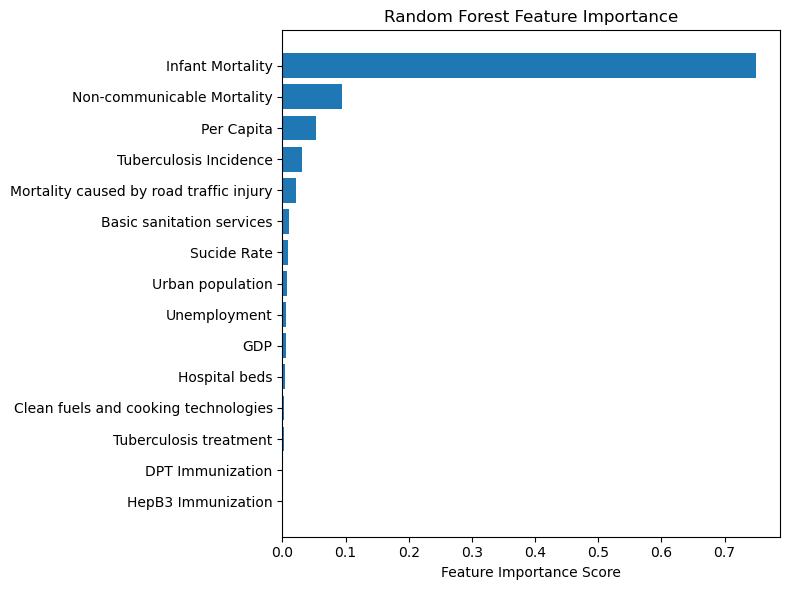

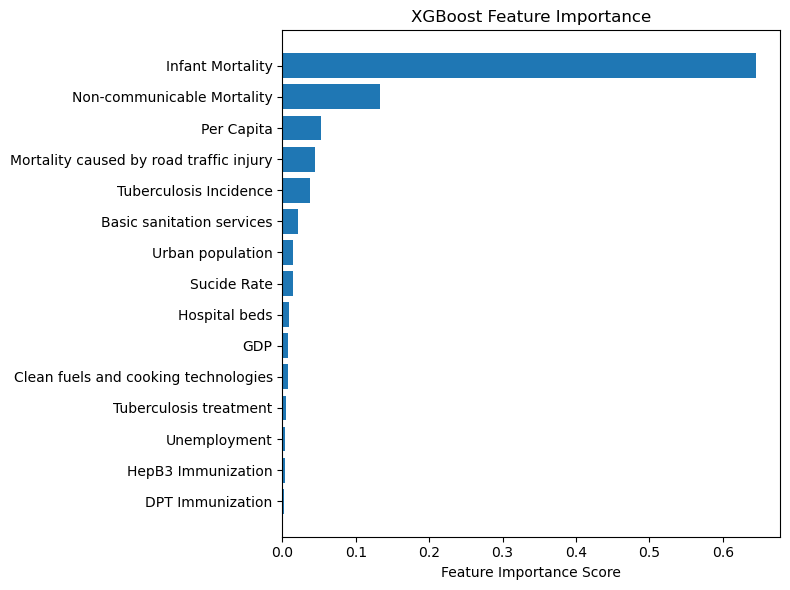

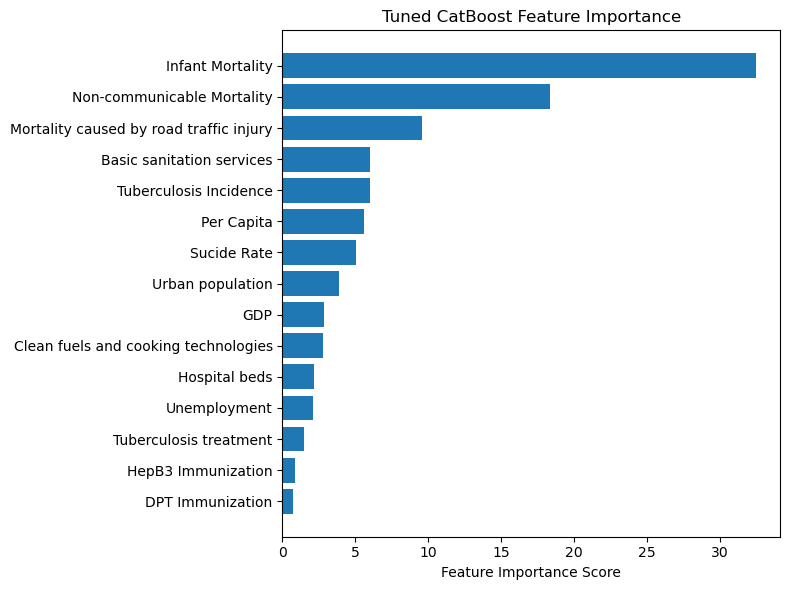

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Load your dataset
df = pd.read_csv("modified.csv")
X = df.drop(columns=["Country", "Gender", "Year.1", "Life expectancy", "Year"])
y = df["Life expectancy"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, verbosity=0)
cat_model = CatBoostRegressor(
    learning_rate=0.1,
    l2_leaf_reg=1,
    iterations=500,
    depth=6,
    verbose=0,
    random_state=42
)

# Fit models
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
cat_model.fit(X_train, y_train)

# Plot function
def plot_feature_importance(model, model_name, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(8, 6))
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.gca().invert_yaxis()
    plt.xlabel("Feature Importance Score")
    plt.title(f"{model_name} Feature Importance")
    plt.tight_layout()
    plt.show()

# Visualize all three
plot_feature_importance(rf_model, "Random Forest", X.columns)
plot_feature_importance(xgb_model, "XGBoost", X.columns)
plot_feature_importance(cat_model, "Tuned CatBoost", X.columns)
